# Library

Some libraries needs to be installed before running the script. You can install them using 

In [ ]:
import zipfile
import os

# Preview Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Preprocessing Data
import shutil
from PIL import Image
import os
import numpy as np

# Model Tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import MobileNet

# Accuracy and Loss
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Version Information

This notebook uses the following versions of TensorFlow and NumPy

In [83]:
print(tf. __version__)
print(np. __version__)


2.15.0
1.26.4


# Obtain a List of Files into `classes_tomato
To obtain a list of files in the `classes_tomato` directory, we use the `os.listdir()` function. This function returns a list containing the names of the entries in the directory given by `data_tomato`. The code snippet below demonstrates how to achieve this:

In [4]:
data_tomato = 'TomatNew'
classes_tomato = os.listdir(data_tomato)


## Assigning Classes to Tomato Images and Displaying Sample Images
This section aims to assign classes to the tomato image dataset and display some sample images from each class. This is done to ensure that the dataset is properly organized and to provide a visual overview of the image variations within each class.

In [5]:
## Print tomato Classes
print ("Classes")
for classes in classes_tomato:
  if os.path.isdir(os.path.join(data_tomato, classes)):
        print(classes)


Classes
Early_blight
Healthy
Leaf_mold
Septoria_leaf_spot
Spider_mites
Yellow_leaf_curl_virus



Early_blight
Total Images: 1000
Resolution of The Image: (256, 256, 3)


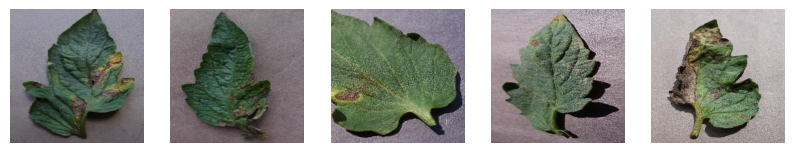


Healthy
Total Images: 1000
Resolution of The Image: (256, 256, 3)


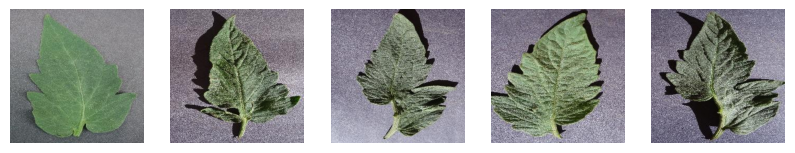


Leaf_mold
Total Images: 952
Resolution of The Image: (256, 256, 3)


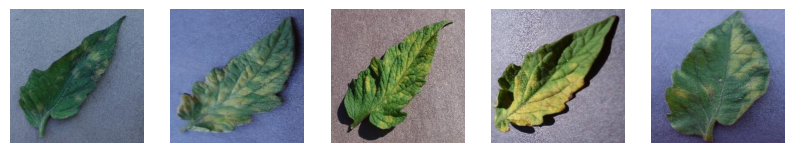


Septoria_leaf_spot
Total Images: 1000
Resolution of The Image: (256, 256, 3)


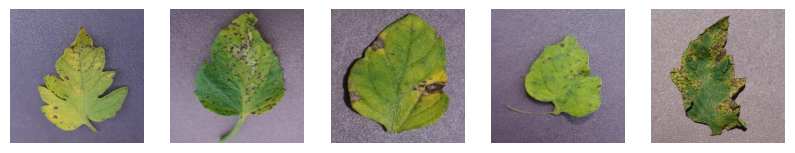


Spider_mites
Total Images: 1000
Resolution of The Image: (256, 256, 3)


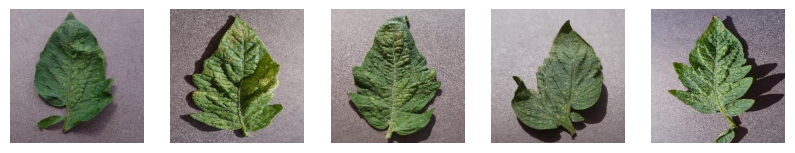


Yellow_leaf_curl_virus
Total Images: 1000
Resolution of The Image: (256, 256, 3)


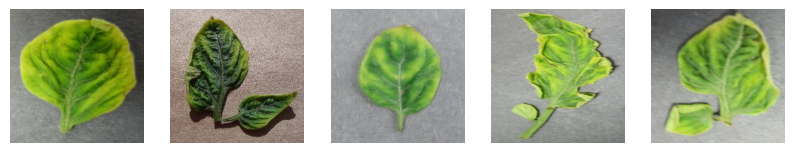

In [40]:
for item in classes_tomato:
  print("")
  print(item)
  class_dir = os.path.join(data_tomato, item)
  class_images = os.listdir(class_dir)
  random.shuffle(class_images)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of The Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# Resized Dataset
In this section, the dataset that was previously resized to a smaller size. Each image is resized to 224x224 pixels and normalized. This resized dataset will be used for further model training

In [7]:
# New Directory for Resized Dataset
resized_dir = "resizetomato"
os.makedirs(resized_dir, exist_ok=True)

# Pixel Normalization
def normalize_image(image):
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image

for item in classes_tomato:
    class_dir = os.path.join(data_tomato, item)
    class_images = os.listdir(class_dir)

    for img_path in class_images:
        # Check if img_path is a file, not a directory
        if os.path.isfile(os.path.join(class_dir, img_path)):
            img = Image.open(os.path.join(class_dir, img_path))
            resized_img = img.resize((224, 224))
            normalized_img = normalize_image(np.array(resized_img))

            # Save Image to resized_dir
            save_path = os.path.join(resized_dir, item, img_path)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            Image.fromarray((normalized_img * 255).astype(np.uint8)).save(save_path)

# Balancing the Dataset
In this section, we balance the dataset by selecting an equal number of images from each class. This step is crucial to prevent the model from being biased towards any particular class. The balanced dataset is saved in a new directory called `balancedtomato`. This directory will be used for splitting the data into training, validation, and test sets.

In [9]:
# New Directory for Balanced Dataset
balanced_dir = "balancedtomato"
os.makedirs(balanced_dir, exist_ok= True)

# Number of Images to Be Selected from Each Class
num_images_per_class = min(len(os.listdir(resized_dir+"/Healthy")),
                           len(os.listdir(resized_dir+"/Early_blight")),
                           len(os.listdir(resized_dir+"/Yellow_leaf_curl_virus")),
                           len(os.listdir(resized_dir+"/Leaf_mold")),
                           len(os.listdir(resized_dir+"/Spider_mites")),
                           len(os.listdir(resized_dir+"/Septoria_leaf_spot")))



# Create New Directory in balanced_dir
os.makedirs(balanced_dir+"/Healthy", exist_ok=True)
os.makedirs(balanced_dir+"/Early_blight", exist_ok=True)
os.makedirs(balanced_dir+"/Yellow_leaf_curl_virus", exist_ok=True)
os.makedirs(balanced_dir+"/Leaf_mold", exist_ok=True)
os.makedirs(balanced_dir+"/Spider_mites", exist_ok=True)
os.makedirs(balanced_dir+"/Septoria_leaf_spot", exist_ok=True)

# Select Some Images from Each Class and Copy to balanced_dir
selected_images = os.listdir(resized_dir+"/Healthy")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Healthy", image), balanced_dir+"/Healthy")

selected_images = os.listdir(resized_dir+"/Early_blight")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Early_blight", image), balanced_dir+"/Early_blight")

selected_images = os.listdir(resized_dir+"/Yellow_leaf_curl_virus")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Yellow_leaf_curl_virus", image), balanced_dir+"/Yellow_leaf_curl_virus")

selected_images = os.listdir(resized_dir+"/Leaf_mold")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Leaf_mold", image), balanced_dir+"/Leaf_mold")

selected_images = os.listdir(resized_dir+"/Spider_mites")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Spider_mites", image), balanced_dir+"/Spider_mites")

selected_images = os.listdir(resized_dir+"/Septoria_leaf_spot")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Septoria_leaf_spot", image), balanced_dir+"/Septoria_leaf_spot")


# Spliting the dataset
The dataset is divided into three parts: 70% for training, 15% for validation, and 15% for testing. This split is crucial to ensure that the trained model can be properly evaluated on unseen data and to avoid overfitting. The divided dataset will be stored in the `train`, `val`, and `test` directories.

In [11]:
from sklearn.model_selection import train_test_split
# Train, Validation, and Test Directory
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

# Split Data into Training, Validation, and Test
class_directories = os.listdir(balanced_dir)
for class_directory in class_directories:
    class_path = os.path.join(balanced_dir, class_directory)
    if os.path.isdir(class_path):
        train_class_dir = os.path.join(train_dir, class_directory)
        os.makedirs(train_class_dir, exist_ok=True)
        val_class_dir = os.path.join(val_dir, class_directory)
        os.makedirs(val_class_dir, exist_ok=True)
        test_class_dir = os.path.join(test_dir, class_directory)
        os.makedirs(test_class_dir, exist_ok=True)

        class_images = os.listdir(class_path)
        train_images, test_images = train_test_split(class_images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

        for image in train_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(train_class_dir, image)
            shutil.copy(src, dst)

        for image in val_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(val_class_dir, image)
            shutil.copy(src, dst)

        for image in test_images:
            src = os.path.join(class_path, image)
            dst = os.path.join(test_class_dir, image)
            shutil.copy(src, dst)

In [12]:
train_image_count = 0
validation_image_count = 0
test_image_count = 0

# Count image in Train Directory
for root, dirs, files in os.walk(train_dir):
    train_image_count += len(files)

# Count image in Validation Directory
for root, dirs, files in os.walk(val_dir):
    validation_image_count += len(files)

# Count image in Test Directory
for root, dirs, files in os.walk(test_dir):
    test_image_count += len(files)

# Show Total Image in Directory
print(f"Total Train Images: {train_image_count} images")
print(f"Total Validation Images: {validation_image_count} images")
print(f"Total Test Images: {test_image_count} images")

Total Train Images: 3996 images
Total Validation Images: 858 images
Total Test Images: 858 images


## GLOBAL VARIABLE

In [45]:
BATCH_SIZE = 64

# Data Augmentation Pipeline

The following section describes the data augmentation pipeline used to artificially increase the size of the dataset by creating modified versions of images. This technique is essential for training deep learning models as it enhances the model's ability to generalize and prevents overfitting. The augmentations applied include rescaling, rotation, width shift, height shift, shear, zoom, horizontal flip, and fill mode. These transformations ensure that the model can recognize objects regardless of their orientation, position, or scale.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input

# Data Augmentation
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Train and Validation Generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 3996 images belonging to 6 classes.
Found 858 images belonging to 6 classes.


# Arsitektur Model ke-1

## Model

In [74]:
from tensorflow.keras.applications import MobileNet


# Base Model
model_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
for layer in model_base.layers:
    layer.trainable = False

# Model
model1 = tf.keras.models.Sequential([
    model_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Model Summary
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 128)               131200    
                                                                 
 dense_21 (Dense)            (None, 6)                 774       
                                                                 
Total params: 3360838 (12.82 MB)
Trainable params: 13

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Callbacks
early_stopping = EarlyStopping(
    patience=8,
    restore_best_weights=True
)

# Compile Model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train Model with callbacks
history = model1.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30
63/63 [==============================] - 65s 988ms/step - loss: 1.0481 - accuracy: 0.6284 - val_loss: 0.3370 - val_accuracy: 0.8858
Epoch 2/30
63/63 [==============================] - 59s 943ms/step - loss: 0.4055 - accuracy: 0.8589 - val_loss: 0.2911 - val_accuracy: 0.8974
Epoch 3/30
63/63 [==============================] - 60s 957ms/step - loss: 0.3513 - accuracy: 0.8809 - val_loss: 0.2330 - val_accuracy: 0.9184
Epoch 4/30
63/63 [==============================] - 56s 890ms/step - loss: 0.2975 - accuracy: 0.8921 - val_loss: 0.1935 - val_accuracy: 0.9301
Epoch 5/30
63/63 [==============================] - 55s 870ms/step - loss: 0.2570 - accuracy: 0.9097 - val_loss: 0.1649 - val_accuracy: 0.9441
Epoch 6/30
63/63 [==============================] - 60s 956ms/step - loss: 0.2688 - accuracy: 0.9057 - val_loss: 0.2022 - val_accuracy: 0.9277
Epoch 7/30
63/63 [==============================] - 54s 862ms/step - loss: 0.2485 - accuracy: 0.9142 - val_loss: 0.1787 - val_accuracy: 0.9429

## Training and Validation Accuracy and Loss

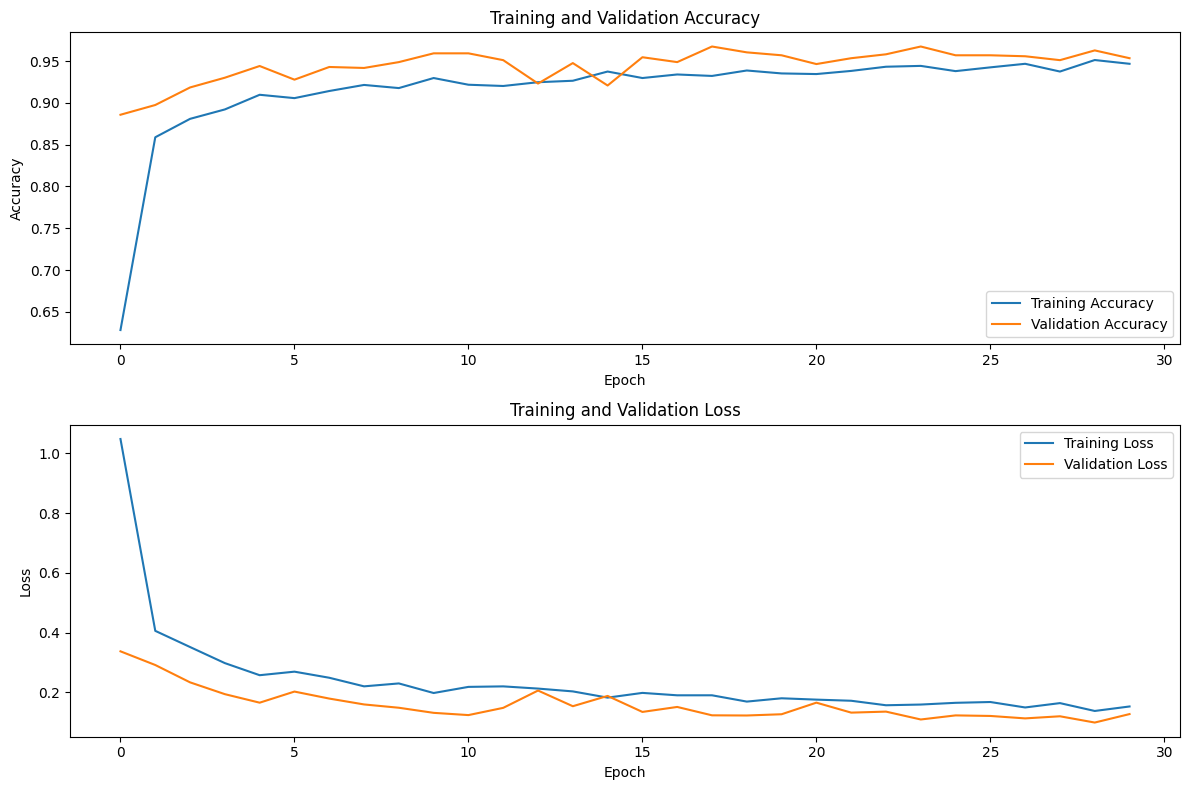

In [77]:
# Plotting Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 8))

# Plotting Accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Maintain spacing between subplots
plt.tight_layout()
plt.show()

In [76]:
# Image Data Generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

# Evaluate the Model on Test Set
loss, accuracy = model1.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 858 images belonging to 6 classes.
14/14 [==============================] - 8s 513ms/step - loss: 0.1896 - accuracy: 0.9347
Test Loss: 0.18961994349956512
Test Accuracy: 0.9347319602966309


## Displays the confusion matrix and classification report 

14/14 [==============================] - 9s 568ms/step


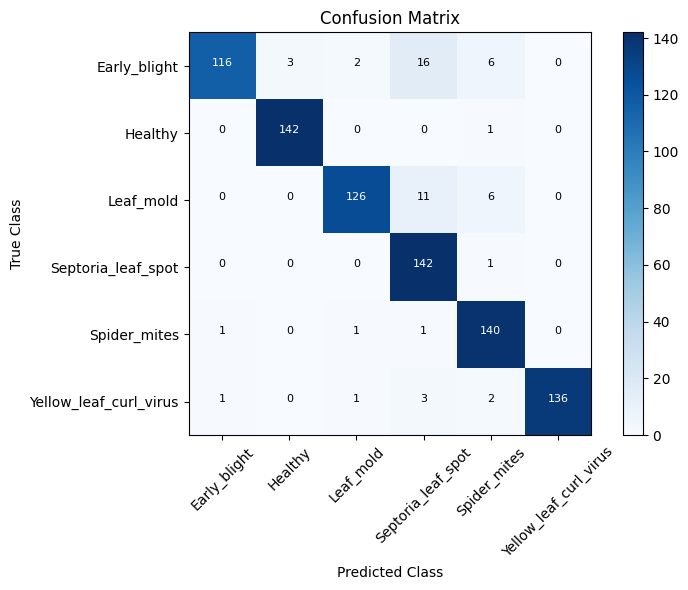

In [ ]:
y_pred = np.argmax(model1.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=8)

plt.tight_layout()

# Showing Plot Confusion Matrix
plt.show()

In [ ]:
# Generate classification report
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)

                        precision    recall  f1-score   support

          Early_blight       0.98      0.81      0.89       143
               Healthy       0.98      0.99      0.99       143
             Leaf_mold       0.97      0.88      0.92       143
    Septoria_leaf_spot       0.82      0.99      0.90       143
          Spider_mites       0.90      0.98      0.94       143
Yellow_leaf_curl_virus       1.00      0.95      0.97       143

              accuracy                           0.93       858
             macro avg       0.94      0.93      0.93       858
          weighted avg       0.94      0.93      0.93       858



# Arsitektur Model ke-2

## Model

In [84]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Output layer with 5 classes
])

model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Callbacks
early_stopping = EarlyStopping(
    patience=8,
    restore_best_weights=True
)

# Compile Model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train Model with callbacks
history1 = model1.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/25
63/63 [==============================] - 64s 984ms/step - loss: 0.1271 - accuracy: 0.9532 - val_loss: 0.0929 - val_accuracy: 0.9685
Epoch 2/25
63/63 [==============================] - 56s 880ms/step - loss: 0.1157 - accuracy: 0.9535 - val_loss: 0.0999 - val_accuracy: 0.9650
Epoch 3/25
63/63 [==============================] - 56s 895ms/step - loss: 0.1121 - accuracy: 0.9572 - val_loss: 0.0806 - val_accuracy: 0.9720
Epoch 4/25
63/63 [==============================] - 59s 934ms/step - loss: 0.1165 - accuracy: 0.9532 - val_loss: 0.1257 - val_accuracy: 0.9580
Epoch 5/25
63/63 [==============================] - 58s 920ms/step - loss: 0.1155 - accuracy: 0.9557 - val_loss: 0.1285 - val_accuracy: 0.9569
Epoch 6/25
63/63 [==============================] - 55s 868ms/step - loss: 0.1023 - accuracy: 0.9637 - val_loss: 0.0779 - val_accuracy: 0.9720
Epoch 7/25
63/63 [==============================] - 52s 827ms/step - loss: 0.1050 - accuracy: 0.9592 - val_loss: 0.1340 - val_accuracy: 0.9580

## Train and Validation Accuracy and Loss

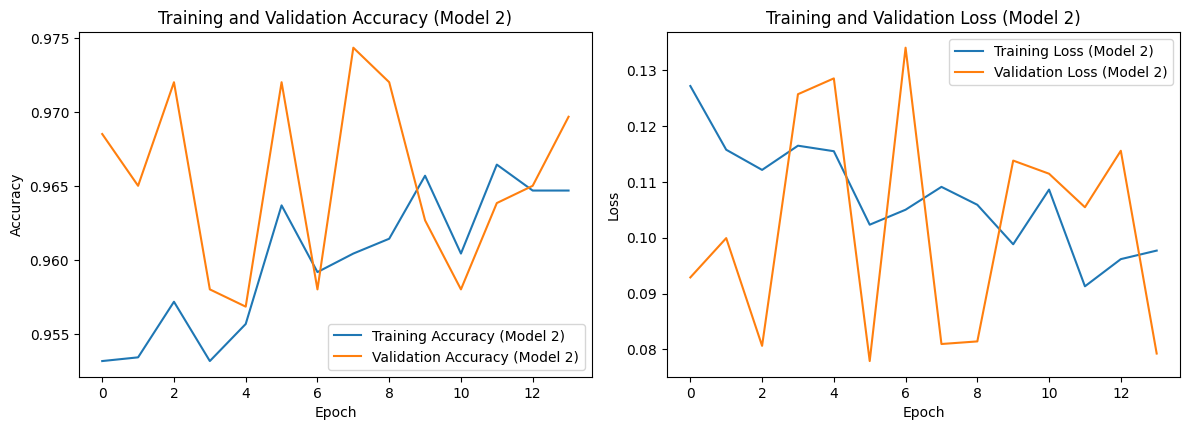

In [87]:
# Plotting Training and Validation Accuracy and Loss for both models
plt.figure(figsize=(12, 8))

# Plotting Accuracy for Model 2
plt.subplot(2, 2, 3)
plt.plot(history1.history['accuracy'], label='Training Accuracy (Model 2)')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy (Model 2)')
plt.title('Training and Validation Accuracy (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss for Model 2
plt.subplot(2, 2, 4)
plt.plot(history1.history['loss'], label='Training Loss (Model 2)')
plt.plot(history1.history['val_loss'], label='Validation Loss (Model 2)')
plt.title('Training and Validation Loss (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Maintain spacing between subplots
plt.tight_layout()
plt.show()

## Displays the confusion matrix and classification report 

14/14 [==============================] - 4s 240ms/step


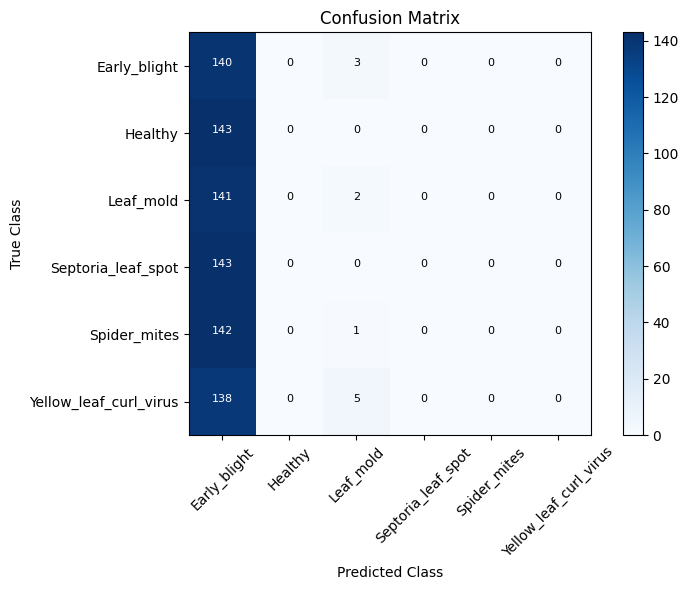

In [95]:
y_pred_model2 = np.argmax(model2.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_model2)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=8)

plt.tight_layout()

# Showing Plot Confusion Matrix
plt.show()

In [97]:
from sklearn.metrics import classification_report

# Generate classification report for model 2
report_model2 = classification_report(y_true, y_pred_model2, target_names=test_generator.class_indices.keys())
print(report_model2)

                        precision    recall  f1-score   support

          Early_blight       0.17      0.98      0.28       143
               Healthy       0.00      0.00      0.00       143
             Leaf_mold       0.18      0.01      0.03       143
    Septoria_leaf_spot       0.00      0.00      0.00       143
          Spider_mites       0.00      0.00      0.00       143
Yellow_leaf_curl_virus       0.00      0.00      0.00       143

              accuracy                           0.17       858
             macro avg       0.06      0.17      0.05       858
          weighted avg       0.06      0.17      0.05       858



c:\Users\Swift GO 14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Swift GO 14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Swift GO 14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Result
Model 1 using transfer learning achieved a higher accuracy and good metrics compared to Model 2, which was trained from scratch. Therefore, we will save Model 1 as an h5 file for future use.

In [ ]:
model1.save('model1.h5')